In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # one way to do regs
from sklearn.linear_model import LinearRegression

diamonds = sns.load_dataset('diamonds')

# remember the relationship between the quality of diamonds and their price:
# low quality diamonds (poor cuts, bad colours, and inferior clarity) have higher prices
graph = sns.catplot(data=diamonds,
                y='price',x='cut',kind='box')
print(graph)

In [2]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


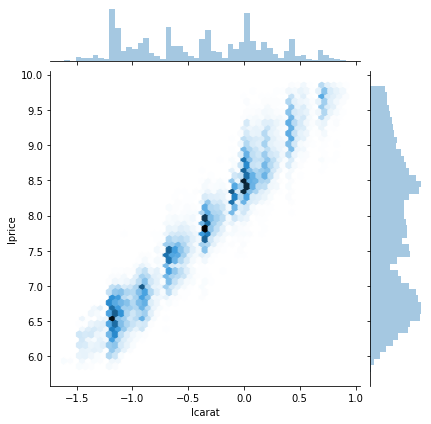

In [3]:
# throw away outliers, deal with remaining outliers/skew via 
# log transformation 
# price is skewed: median <<<< mean
diamonds2 = (diamonds
             .query('carat<2.5')
             .assign(lprice = np.log(diamonds['price']) )
             .assign(lcarat = np.log(diamonds['carat']) )
            )
                                    
diamonds2.describe()
sns.jointplot(data=diamonds2, x='lcarat', y='lprice', kind='hex')

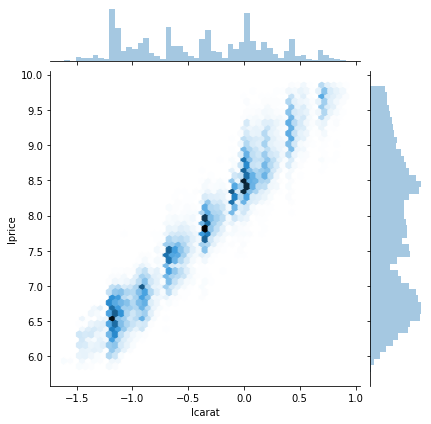

In [4]:
diamonds2 = (diamonds
             .query('carat<2.5')
             .assign(lprice = np.log(diamonds['price']) )
             .assign(lcarat = np.log(diamonds['carat']) )
             .assign (const =1)
            )
                                    
diamonds2.describe()
sns.jointplot(data=diamonds2, x='lcarat', y='lprice', kind='hex')

In [5]:
# Regress me 
y= diamonds2['lprice']
x= diamonds2[['const','lcarat']]

# OR

model1= sm.OLS(y,x)
results1 = model1.fit()
print (results1.summary())

# regression coefficient mean: for a one unit increase in x, y will increase by ###
# when log (carat) goes up 1, log(price) goes up 1.68...On average, all else is equal 

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:58:44   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4525      0.001   6193.432      0.0

In [6]:
# another way ... sklearn

model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)
residl = y - y_predict

In [7]:
diamonds2['lprice_predict'] = model.predict(x)
diamonds2['lprice_predict_error'] = y - diamonds2['lprice_predict'] 

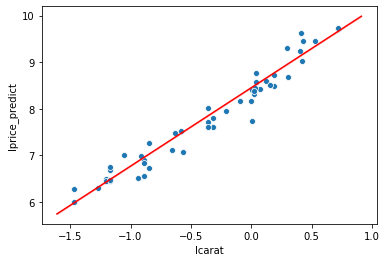

In [8]:
#### Don: Post me 
diamonds2[['lprice','lprice_predict','lprice_predict_error']].describe()

diamonds2['price_predict'] = np.exp(diamonds2['lprice_predict'])
diamonds2['price_predict_error'] = diamonds2['price'] - diamonds2['price_predict']

g = sns.scatterplot(data=diamonds2.sample(50), y='lprice',x='lcarat') 
sns.lineplot(data=diamonds2, y='lprice_predict',x='lcarat',color='red')

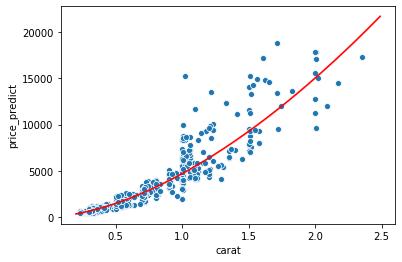

In [9]:
g = sns.scatterplot(data=diamonds2.sample(500), y='price',x='carat') 
sns.lineplot(data=diamonds2, y='price_predict',x='carat',color='red')

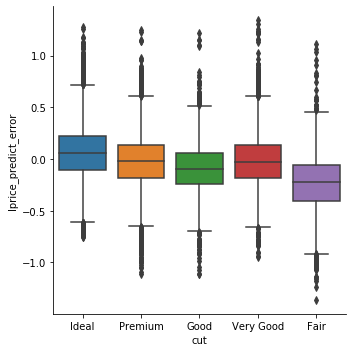

In [10]:
#############################################################
# after taking away the effect of carats!
#....cut is actually positively related to price!
#############################################################

sns.catplot(data=diamonds2,
                y='lprice_predict_error',x='cut',kind='box')

In [11]:
# a second variable

X = diamonds2[['lcarat','x']]
y = pd.DataFrame(diamonds2['lprice'])

model = LinearRegression()
model.fit(X, y).coef_

array([[1.47192958, 0.11092326]])

In [12]:
# a third ... a mysterious error emerges
X = diamonds2[['lcarat','cut']]
y = pd.DataFrame(diamonds2['lprice'])

model = LinearRegression()
model.fit(X, y)

ValueError: could not convert string to float: 'Ideal'